# Wczytanie danych

In [1]:
#Wczytanie bibliotek
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.pyplot as plt
import scipy.stats
import plotly as px 
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly

In [2]:
##Przeprowadzenie integralności plików
df_sets = pd.read_csv("Data2\\Brickset.csv")
df_sets_2 = pd.read_csv("Data2\\sets.csv")

#Zbiór Themes
df_themes = pd.read_csv("Data2\\themes.csv")

#Zbiór Colors
df_colors = pd.read_csv("Data2\\colors.csv")

#Zbiór Inventories i Inventories_parts
df_inv = pd.read_csv("Data2\\inventories.csv")
df_inv_parts = pd.read_csv("Data2\\inventory_parts.csv")

In [3]:
df_sets

Number      Theme               Subtheme  Year   
0        3695-1   Fabuland                    NaN  1982  \
1        1066-1      Dacta                   Town  1982   
2      852293-1       Gear            Board Games  2008   
3        3866-1      Games               Licensed  2012   
4        9247-2  Education                    NaN  2006   
...         ...        ...                    ...   ...   
10020  851942-1       Gear         Role-play toys  2007   
10021  851641-1       Gear  Trading/Playing cards  2007   
10022  852043-1       Gear               Clothing  2007   
10023  852038-1       Gear               Clothing  2007   
10024  852037-1       Gear               Clothing  2007   

                                     Set name  Minifigs  Pieces  RRP (GBP)   
0                           Figure collection      80.0     NaN        NaN  \
1              Little People with Accessories      36.0   138.0        NaN   
2                      Castle Giant Chess Set      33.0     NaN     136.99   
3               Star Wars: The Battle of Hoth      32.0   305.0      24.99   
4                           Community Workers      31.0   235.0      36.99   
...                                       ...       ...     ...        ...   
10020                           Viking Armour       NaN     NaN      14.99   
10021                        City Memory Game       NaN     NaN       6.49   
10022                         Grey Racers Cap       NaN     NaN       7.99   
10023  Exo-Force Turquoise Children's T-shirt       NaN     NaN        NaN   
10024       Exo-Force Navy Children's T-shirt       NaN     NaN        NaN   

       RRP (USD)  RRP (CAD)  ...  Unnamed: 26  Unnamed: 27  Unnamed: 28   
0            NaN        NaN  ...          NaN          NaN          NaN  \
1            NaN        NaN  ...          NaN          NaN          NaN   
2         199.99        NaN  ...          NaN          NaN          NaN   
3            NaN        NaN  ...          NaN          NaN          NaN   
4          49.99      69.99  ...          NaN          NaN          NaN   
...          ...        ...  ...          ...          ...          ...   
10020        NaN        NaN  ...          NaN          NaN          NaN   
10021       7.99        NaN  ...          NaN          NaN          NaN   
10022        NaN        NaN  ...          NaN          NaN          NaN   
10023        NaN        NaN  ...          NaN          NaN          NaN   
10024        NaN        NaN  ...          NaN          NaN          NaN   

       Unnamed: 29  Unnamed: 30  Unnamed: 31  Value new (USD)   
0              NaN          NaN          NaN              NaN  \
1              NaN          NaN          NaN           118.04   
2              NaN          NaN          NaN              NaN   
3              NaN          NaN          NaN            95.00   
4              NaN          NaN          NaN            92.50   
...            ...          ...          ...              ...   
10020          NaN          NaN          NaN              NaN   
10021          NaN          NaN          NaN              NaN   
10022          NaN          NaN          NaN              NaN   
10023          NaN          NaN          NaN              NaN   
10024          NaN          NaN          NaN              NaN   

       Value used (USD)  Launch date   Exit date  
0                   NaN          NaN         NaN  
1                   NaN          NaN         NaN  
2                794.31          NaN         NaN  
3                 30.35   01/02/2012  31/12/2013  
4                 46.35          NaN         NaN  
...                 ...          ...         ...  
10020               NaN          NaN         NaN  
10021               NaN          NaN         NaN  
10022               NaN          NaN         NaN  
10023               NaN          NaN         NaN  
10024               NaN          NaN         NaN  

[10025 rows x 36 columns]

In [4]:
#Rezygnacja z kolumn
df_sets = df_sets.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,33,34,35]]
#Połączenie ramek danych
df_sets_2 = df_sets_2.rename(columns={'set_num' : 'Number'})
sets_df = pd.merge(df_sets, df_sets_2, on='Number', how='left')

In [5]:
sets_df.isnull().sum()

Number                 0
Theme                  0
Subtheme            1811
Year                   0
Set name               0
Minifigs            1254
Pieces               639
RRP (GBP)           4206
RRP (USD)           2919
RRP (CAD)           6125
RRP (EUR)           7045
Value used (USD)    2067
Launch date         4720
Exit date           4720
name                 336
year                 336
theme_id             336
num_parts            336
img_url              336
dtype: int64

In [6]:
kolumny = ['name','year','num_parts']
sets_df = sets_df.drop(columns=kolumny)

In [7]:
sets_df

Number      Theme               Subtheme  Year   
0        3695-1   Fabuland                    NaN  1982  \
1        1066-1      Dacta                   Town  1982   
2      852293-1       Gear            Board Games  2008   
3        3866-1      Games               Licensed  2012   
4        9247-2  Education                    NaN  2006   
...         ...        ...                    ...   ...   
10020  851942-1       Gear         Role-play toys  2007   
10021  851641-1       Gear  Trading/Playing cards  2007   
10022  852043-1       Gear               Clothing  2007   
10023  852038-1       Gear               Clothing  2007   
10024  852037-1       Gear               Clothing  2007   

                                     Set name  Minifigs  Pieces  RRP (GBP)   
0                           Figure collection      80.0     NaN        NaN  \
1              Little People with Accessories      36.0   138.0        NaN   
2                      Castle Giant Chess Set      33.0     NaN     136.99   
3               Star Wars: The Battle of Hoth      32.0   305.0      24.99   
4                           Community Workers      31.0   235.0      36.99   
...                                       ...       ...     ...        ...   
10020                           Viking Armour       NaN     NaN      14.99   
10021                        City Memory Game       NaN     NaN       6.49   
10022                         Grey Racers Cap       NaN     NaN       7.99   
10023  Exo-Force Turquoise Children's T-shirt       NaN     NaN        NaN   
10024       Exo-Force Navy Children's T-shirt       NaN     NaN        NaN   

       RRP (USD)  RRP (CAD)  RRP (EUR)  Value used (USD) Launch date   
0            NaN        NaN        NaN               NaN         NaN  \
1            NaN        NaN        NaN               NaN         NaN   
2         199.99        NaN        NaN            794.31         NaN   
3            NaN        NaN        NaN             30.35  01/02/2012   
4          49.99      69.99        NaN             46.35         NaN   
...          ...        ...        ...               ...         ...   
10020        NaN        NaN        NaN               NaN         NaN   
10021       7.99        NaN        NaN               NaN         NaN   
10022        NaN        NaN        NaN               NaN         NaN   
10023        NaN        NaN        NaN               NaN         NaN   
10024        NaN        NaN        NaN               NaN         NaN   

        Exit date  theme_id                                            img_url  
0             NaN     390.0  https://cdn.rebrickable.com/media/sets/3695-1.jpg  
1             NaN     533.0  https://cdn.rebrickable.com/media/sets/1066-1.jpg  
2             NaN     193.0  https://cdn.rebrickable.com/media/sets/852293-...  
3      31/12/2013     502.0  https://cdn.rebrickable.com/media/sets/3866-1.jpg  
4             NaN     533.0  https://cdn.rebrickable.com/media/sets/9247-2.jpg  
...           ...       ...                                                ...  
10020         NaN     737.0  https://cdn.rebrickable.com/media/sets/851942-...  
10021         NaN     741.0  https://cdn.rebrickable.com/media/sets/851641-...  
10022         NaN     501.0  https://cdn.rebrickable.com/media/sets/852043-...  
10023         NaN     501.0  https://cdn.rebrickable.com/media/sets/852038-...  
10024         NaN     501.0  https://cdn.rebrickable.com/media/sets/852037-...  

[10025 rows x 16 columns]

In [8]:
sets_themes = pd.merge(df_sets_2, df_themes, 
                     how='left',
                     left_on='theme_id',
                     right_on='id',
                     suffixes=('_sets','_themes')
                    )

In [9]:
sets_themes

Number                        name_sets  year  theme_id   
0      0003977811-1      Ninjago: Book of Adventures  2022       761  \
1             001-1                            Gears  1965       756   
2            0011-2                Town Mini-Figures  1979        67   
3            0011-3       Castle 2 for 1 Bonus Offer  1987       199   
4            0012-1               Space Mini-Figures  1979       143   
...             ...                              ...   ...       ...   
22314       XWING-1              Mini X-Wing Fighter  2019       158   
22315       XWING-2                X-Wing Trench Run  2019       158   
22316   YODACHRON-1  Yoda Chronicles Promotional Set  2013       158   
22317    YTERRIER-1                Yorkshire Terrier  2018       598   
22318      ZX8000-1             ZX 8000 LEGO Sneaker  2020       501   

       num_parts                                            img_url   id   
0              1  https://cdn.rebrickable.com/media/sets/0003977...  761  \
1             43   https://cdn.rebrickable.com/media/sets/001-1.jpg  756   
2             12  https://cdn.rebrickable.com/media/sets/0011-2.jpg   67   
3              0  https://cdn.rebrickable.com/media/sets/0011-3.jpg  199   
4             12  https://cdn.rebrickable.com/media/sets/0012-1.jpg  143   
...          ...                                                ...  ...   
22314         60  https://cdn.rebrickable.com/media/sets/xwing-1...  158   
22315         52  https://cdn.rebrickable.com/media/sets/xwing-2...  158   
22316        413  https://cdn.rebrickable.com/media/sets/yodachr...  158   
22317          0  https://cdn.rebrickable.com/media/sets/yterrie...  598   
22318          0  https://cdn.rebrickable.com/media/sets/zx8000-...  501   

                          name_themes  parent_id  
0      Activity Books with LEGO Parts      497.0  
1                           Samsonite      365.0  
2                        Classic Town       50.0  
3                        Lion Knights      186.0  
4                        Supplemental      126.0  
...                               ...        ...  
22314                       Star Wars        NaN  
22315                       Star Wars        NaN  
22316                       Star Wars        NaN  
22317                     Promotional        NaN  
22318                            Gear        NaN  

[22319 rows x 9 columns]

In [10]:
inv_colors = pd.merge(df_inv_parts,df_colors, how='left', left_on='color_id',right_on='id')
inv_colors = pd.merge(inv_colors,df_inv, how='left', left_on='inventory_id',right_on='id')
inv_colors = pd.merge(inv_colors,df_sets_2, how='left', left_on='set_num',right_on='Number')


In [11]:
inv_colors

inventory_id         part_num  color_id  quantity is_spare   
0                   1         48379c04        72         1        f  \
1                   1            48395         7         1        f   
2                   1   stickerupn0077      9999         1        f   
3                   1          upn0342         0         1        f   
4                   1          upn0350        25         1        f   
...               ...              ...       ...       ...      ...   
1215135        209083              715         4         2        f   
1215136        209257      3626bpr0165        14         1        f   
1215137        209257             6093         6         1        f   
1215138        209257           970c01        15         1        f   
1215139        209257  973c01h01pr0023        13         1        f   

                                                 img_url_x  id_x   
0        https://cdn.rebrickable.com/media/parts/photos...    72  \
1        https://cdn.rebrickable.com/media/parts/photos...     7   
2                                                      NaN  9999   
3        https://cdn.rebrickable.com/media/parts/photos...     0   
4                                                      NaN    25   
...                                                    ...   ...   
1215135  https://cdn.rebrickable.com/media/parts/ldraw/...     4   
1215136  https://cdn.rebrickable.com/media/parts/ldraw/...    14   
1215137  https://cdn.rebrickable.com/media/parts/elemen...     6   
1215138  https://cdn.rebrickable.com/media/parts/elemen...    15   
1215139  https://cdn.rebrickable.com/media/parts/photos...    13   

                       name_x     rgb is_trans    id_y  version     set_num   
0            Dark Bluish Gray  6C6E68        f       1        1      7922-1  \
1                  Light Gray  9BA19D        f       1        1      7922-1   
2        [No Color/Any Color]  05131D        f       1        1      7922-1   
3                       Black  05131D        f       1        1      7922-1   
4                      Orange  FE8A18        f       1        1      7922-1   
...                       ...     ...      ...     ...      ...         ...   
1215135                   Red  C91A09        f  209083        2       401-3   
1215136                Yellow  F2CD37        f  209257        1  fig-014727   
1215137                 Brown  583927        f  209257        1  fig-014727   
1215138                 White  FFFFFF        f  209257        1  fig-014727   
1215139                  Pink  FC97AC        f  209257        1  fig-014727   

         Number                                             name_y    year   
0        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0  \
1        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0   
2        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0   
3        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0   
4        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0   
...         ...                                                ...     ...   
1215135   401-3                   Large Wheels with Axles (System)  1963.0   
1215136     NaN                                                NaN     NaN   
1215137     NaN                                                NaN     NaN   
1215138     NaN                                                NaN     NaN   
1215139     NaN                                                NaN     NaN   

         theme_id  num_parts   
0           460.0        5.0  \
1           460.0        5.0   
2           460.0        5.0   
3           460.0        5.0   
4           460.0        5.0   
...           ...        ...   
1215135     371.0        7.0   
1215136       NaN        NaN   
1215137       NaN        NaN   
1215138       NaN        NaN   
1215139       NaN        NaN   

                                                 img_url_y  
0      

# Analiza danych - zbiór inv_colors

In [12]:
inv_colors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215140 entries, 0 to 1215139
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   inventory_id  1215140 non-null  int64  
 1   part_num      1215140 non-null  object 
 2   color_id      1215140 non-null  int64  
 3   quantity      1215140 non-null  int64  
 4   is_spare      1215140 non-null  object 
 5   img_url_x     1206996 non-null  object 
 6   id_x          1215140 non-null  int64  
 7   name_x        1215140 non-null  object 
 8   rgb           1215140 non-null  object 
 9   is_trans      1215140 non-null  object 
 10  id_y          1215140 non-null  int64  
 11  version       1215140 non-null  int64  
 12  set_num       1215140 non-null  object 
 13  Number        1146927 non-null  object 
 14  name_y        1146927 non-null  object 
 15  year          1146927 non-null  float64
 16  theme_id      1146927 non-null  float64
 17  num_parts     1146927 non-n

In [13]:
inv_colors.isnull().sum()

inventory_id        0
part_num            0
color_id            0
quantity            0
is_spare            0
img_url_x        8144
id_x                0
name_x              0
rgb                 0
is_trans            0
id_y                0
version             0
set_num             0
Number          68213
name_y          68213
year            68213
theme_id        68213
num_parts       68213
img_url_y       68213
dtype: int64

In [14]:
pop_color = inv_colors.groupby('name_x')['quantity'].sum().reset_index()
pop_color_sorted = pop_color.sort_values(by='quantity', ascending=False)
print(pop_color_sorted[['name_x', 'quantity']])

                    name_x  quantity
1                    Black    757977
98       Light Bluish Gray    465811
249                  White    459669
25        Dark Bluish Gray    331358
181                    Red    298022
..                     ...       ...
57    Glitter Trans-Orange         1
188            Rust Orange         1
82         HO Light Yellow         1
37       Duplo Dark Purple         1
88   HO Metallic Sand Blue         1

[254 rows x 2 columns]


In [15]:
mean_quantity = pop_color['quantity'].mean()
median_quantity = pop_color['quantity'].median()
std_dev_quantity = pop_color['quantity'].std()
print(mean_quantity,median_quantity,std_dev_quantity)

fig = px.box(pop_color, y='quantity')

fig.show()

16128.055118110236 112.5 71641.06061777448


In [16]:
import plotly.express as px

top_10_values = pop_color_sorted.head(10)

color_sequence = ['#05131D','#A0A5A9','#FFFFFF','#6C6E68','#C91A09','#F2CD37','#0055BF','#E4CD9E','#582A12','#9BA19D']

fig = px.histogram(top_10_values, x="name_x", y='quantity', labels={'name_x': 'Nazwa Koloru', 'quantity': 'Ilość'},
                   color='name_x', color_discrete_sequence=color_sequence)
fig.update_layout(
    yaxis=dict(
        title='Ilość elementów wytępowanego koloru w tyś.',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Histogram Top 10 Kolorów pod względem ilości występowania', title_x=0.5)
fig.show()


In [17]:
inv_colors

inventory_id         part_num  color_id  quantity is_spare   
0                   1         48379c04        72         1        f  \
1                   1            48395         7         1        f   
2                   1   stickerupn0077      9999         1        f   
3                   1          upn0342         0         1        f   
4                   1          upn0350        25         1        f   
...               ...              ...       ...       ...      ...   
1215135        209083              715         4         2        f   
1215136        209257      3626bpr0165        14         1        f   
1215137        209257             6093         6         1        f   
1215138        209257           970c01        15         1        f   
1215139        209257  973c01h01pr0023        13         1        f   

                                                 img_url_x  id_x   
0        https://cdn.rebrickable.com/media/parts/photos...    72  \
1        https://cdn.rebrickable.com/media/parts/photos...     7   
2                                                      NaN  9999   
3        https://cdn.rebrickable.com/media/parts/photos...     0   
4                                                      NaN    25   
...                                                    ...   ...   
1215135  https://cdn.rebrickable.com/media/parts/ldraw/...     4   
1215136  https://cdn.rebrickable.com/media/parts/ldraw/...    14   
1215137  https://cdn.rebrickable.com/media/parts/elemen...     6   
1215138  https://cdn.rebrickable.com/media/parts/elemen...    15   
1215139  https://cdn.rebrickable.com/media/parts/photos...    13   

                       name_x     rgb is_trans    id_y  version     set_num   
0            Dark Bluish Gray  6C6E68        f       1        1      7922-1  \
1                  Light Gray  9BA19D        f       1        1      7922-1   
2        [No Color/Any Color]  05131D        f       1        1      7922-1   
3                       Black  05131D        f       1        1      7922-1   
4                      Orange  FE8A18        f       1        1      7922-1   
...                       ...     ...      ...     ...      ...         ...   
1215135                   Red  C91A09        f  209083        2       401-3   
1215136                Yellow  F2CD37        f  209257        1  fig-014727   
1215137                 Brown  583927        f  209257        1  fig-014727   
1215138                 White  FFFFFF        f  209257        1  fig-014727   
1215139                  Pink  FC97AC        f  209257        1  fig-014727   

         Number                                             name_y    year   
0        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0  \
1        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0   
2        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0   
3        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0   
4        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0   
...         ...                                                ...     ...   
1215135   401-3                   Large Wheels with Axles (System)  1963.0   
1215136     NaN                                                NaN     NaN   
1215137     NaN                                                NaN     NaN   
1215138     NaN                                                NaN     NaN   
1215139     NaN                                                NaN     NaN   

         theme_id  num_parts   
0           460.0        5.0  \
1           460.0        5.0   
2           460.0        5.0   
3           460.0        5.0   
4           460.0        5.0   
...           ...        ...   
1215135     371.0        7.0   
1215136       NaN        NaN   
1215137       NaN        NaN   
1215138       NaN        NaN   
1215139       NaN        NaN   

                                                 img_url_y  
0      

In [18]:
df = pd.DataFrame(inv_colors)

def get_decade_label(year):
    if 1950 <= year < 1960:
        return "1950"
    elif 1960 <= year < 1970:
        return "1960"
    elif 1970 <= year < 1980:
        return "1970"
    elif 1980 <= year < 1990:
        return "1980"
    elif 1990 <= year < 2000:
        return "1990"
    elif 2000 <= year < 2010:
        return "2000"
    elif 2010 <= year < 2020:
        return "2010"
    elif 2020 <= year < 2030:
        return "2020"
    
    
df['decade'] = df['year'].apply(get_decade_label)


In [19]:
df

inventory_id         part_num  color_id  quantity is_spare   
0                   1         48379c04        72         1        f  \
1                   1            48395         7         1        f   
2                   1   stickerupn0077      9999         1        f   
3                   1          upn0342         0         1        f   
4                   1          upn0350        25         1        f   
...               ...              ...       ...       ...      ...   
1215135        209083              715         4         2        f   
1215136        209257      3626bpr0165        14         1        f   
1215137        209257             6093         6         1        f   
1215138        209257           970c01        15         1        f   
1215139        209257  973c01h01pr0023        13         1        f   

                                                 img_url_x  id_x   
0        https://cdn.rebrickable.com/media/parts/photos...    72  \
1        https://cdn.rebrickable.com/media/parts/photos...     7   
2                                                      NaN  9999   
3        https://cdn.rebrickable.com/media/parts/photos...     0   
4                                                      NaN    25   
...                                                    ...   ...   
1215135  https://cdn.rebrickable.com/media/parts/ldraw/...     4   
1215136  https://cdn.rebrickable.com/media/parts/ldraw/...    14   
1215137  https://cdn.rebrickable.com/media/parts/elemen...     6   
1215138  https://cdn.rebrickable.com/media/parts/elemen...    15   
1215139  https://cdn.rebrickable.com/media/parts/photos...    13   

                       name_x     rgb is_trans    id_y  version     set_num   
0            Dark Bluish Gray  6C6E68        f       1        1      7922-1  \
1                  Light Gray  9BA19D        f       1        1      7922-1   
2        [No Color/Any Color]  05131D        f       1        1      7922-1   
3                       Black  05131D        f       1        1      7922-1   
4                      Orange  FE8A18        f       1        1      7922-1   
...                       ...     ...      ...     ...      ...         ...   
1215135                   Red  C91A09        f  209083        2       401-3   
1215136                Yellow  F2CD37        f  209257        1  fig-014727   
1215137                 Brown  583927        f  209257        1  fig-014727   
1215138                 White  FFFFFF        f  209257        1  fig-014727   
1215139                  Pink  FC97AC        f  209257        1  fig-014727   

         Number                                             name_y    year   
0        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0  \
1        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0   
2        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0   
3        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0   
4        7922-1  McDonald's Sports Set Number 6 - Orange Vest S...  2004.0   
...         ...                                                ...     ...   
1215135   401-3                   Large Wheels with Axles (System)  1963.0   
1215136     NaN                                                NaN     NaN   
1215137     NaN                                                NaN     NaN   
1215138     NaN                                                NaN     NaN   
1215139     NaN                                                NaN     NaN   

         theme_id  num_parts   
0           460.0        5.0  \
1           460.0        5.0   
2           460.0        5.0   
3           460.0        5.0   
4           460.0        5.0   
...           ...        ...   
1215135     371.0        7.0   
1215136       NaN        NaN   
1215137       NaN        NaN   
1215138       NaN        NaN   
1215139       NaN        NaN   

                                                 img_url_y decade  


In [20]:
def get_decade_label(year):
    if 1950 <= year < 1960:
        return "1950"
    elif 1960 <= year < 1970:
        return "1960"
    elif 1970 <= year < 1980:
        return "1970"
    elif 1980 <= year < 1990:
        return "1980"
    elif 1990 <= year < 2000:
        return "1990"
    elif 2000 <= year < 2010:
        return "2000"
    elif 2010 <= year < 2020:
        return "2010"
    elif 2020 <= year < 2030:
        return "2020"
    
    
inv_colors['decade'] = inv_colors['year'].apply(get_decade_label)


In [21]:
colors_per_decade = inv_colors.groupby(['decade', 'name_x']).size().reset_index(name='count')
max_count_indices = colors_per_decade.groupby('decade')['count'].idxmax()
max_count_data = colors_per_decade.loc[max_count_indices, ['decade', 'name_x', 'count']]
max_count_data


decade name_x  count
35    1950  White    812
83    1960    Red   1676
106   1970    Red   4287
115   1980  Black   8757
145   1990  Black  20529
212   2000  Black  39555
363   2010  Black  76752
443   2020  Black  53251

In [22]:
import plotly.express as px
max_count_data = max_count_data.rename(columns={'name_x' : 'Kolor'})
color_sequence = ['#FFFFFF','#C91A09','#05131D']

fig = px.histogram(max_count_data, x="decade", y='count', labels={'decade': 'Dekada', 'count': 'ilość elementów'},
                   color='Kolor', color_discrete_sequence=color_sequence)
fig.update_layout(
    yaxis=dict(
        title='Ilość elementów wytępowania koloru w tyś.',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Histogram koloru o największej ilości elementów w dekadzie', title_x=0.5)
fig.show()


In [23]:
df2 = inv_colors.groupby(['name_x','decade','rgb'])['quantity'].sum().reset_index()
df2

name_x decade     rgb  quantity
0                    Aqua   1990  B3D7D1        22
1                    Aqua   2000  B3D7D1       309
2                   Black   1950  05131D       197
3                   Black   1960  05131D      3855
4                   Black   1970  05131D     14550
..                    ...    ...     ...       ...
522  [No Color/Any Color]   2000  05131D      2397
523  [No Color/Any Color]   2010  05131D      3557
524  [No Color/Any Color]   2020  05131D      1736
525             [Unknown]   2000  0033B2         6
526             [Unknown]   2010  0033B2         1

[527 rows x 4 columns]

In [24]:
df_s = df2.groupby('decade').apply(lambda group: group.nsmallest(10, 'quantity')).reset_index(drop=True)
df_s['total_quantity'] = df_s.groupby('decade')['quantity'].transform('sum')
df_s['percentage'] = (df_s['quantity'] / df_s['total_quantity']) * 100
df_s = df_s.drop(['total_quantity','quantity'], axis=1)
df_s['rgb'] = '#' + df_s['rgb']
df_s['percentage'] = df_s['percentage'].round(2)
rare_colors_in_decade = df_s

In [25]:
rare_colors_in_decade

name_x decade      rgb  percentage
0                    HO Aqua   1950  #B3D7D1       10.00
1                    HO Cyan   1950  #5b98b3       10.00
2               HO Dark Aqua   1950  #a7dccf       10.00
3              HO Dark Green   1950  #184632       10.00
4               HO Dark Lime   1950  #b2b955       10.00
..                       ...    ...      ...         ...
75           Pearl Dark Gray   2020  #575857        5.56
76              Medium Brown   2020  #755945       10.42
77                  Warm Tan   2020  #CCA373       15.28
78  Glitter Trans-Light Blue   2020  #68BCC5       27.78
79   Glitter Trans-Dark Pink   2020  #DF6695       30.56

[80 rows x 4 columns]

In [26]:
from plotly.graph_objs import Bar
from plotly.subplots import make_subplots
from plotly.offline import iplot

# ... (wcześniejsza część kodu)

# Dostosowanie kolejności dekad
decade_order = sorted(rare_colors_in_decade['decade'].unique())

# Tworzenie wykresu słupkowego
fig = make_subplots(rows=1, cols=1, subplot_titles=["Top 10 rzadkich kolorów dekad"])

for color in rare_colors_in_decade['name_x'].unique():
    color_df = rare_colors_in_decade[rare_colors_in_decade['name_x'] == color]
    trace = Bar(
        x=color_df['decade'],
        y=color_df['percentage'],
        hoverinfo="text",
        marker=dict(
            color=color_df['rgb']
        ),
        name=color
    )
    fig.add_trace(trace)

# Dostosowanie layoutu
fig.update_layout(
    width=595,
    height=600,
    paper_bgcolor='#cfd3d3',
    plot_bgcolor='#cfd3d3',
    barmode='stack',
    hovermode='closest',  
    margin=dict(b=55, l=55, r=30, t=55),
    showlegend=False,
    title='Paleta rzadkich kolorów LEGO',
    titlefont=dict(
        family='Helvetica',
        size=16,
        color='#394242'
    ),
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        categoryorder='array',
        categoryarray=decade_order  
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        title='Procent ilościowy',
        titlefont=dict(
            family='Helvetica',
            size=14,
            color='#666666'
        ),
    )
)

# Wyświetlenie wykresu
iplot(fig)


In [27]:
df2 = df2.groupby('decade').apply(lambda group: group.nlargest(10, 'quantity')).reset_index(drop=True)
df2['total_quantity'] = df2.groupby('decade')['quantity'].transform('sum')
df2['percentage'] = (df2['quantity'] / df2['total_quantity']) * 100
df2 = df2.drop(['total_quantity','quantity'], axis=1)
df2['rgb'] = '#' + df2['rgb']
df2['percentage'] = df2['percentage'].round(2)
colors_in_decade = df2

In [28]:
colors_in_decade

name_x decade      rgb  percentage
0           White   1950  #FFFFFF       51.16
1             Red   1950  #C91A09       20.09
2            Blue   1950  #0055BF       10.55
3          Yellow   1950  #F2CD37        7.68
4     Trans-Clear   1950  #FCFCFC        5.46
..            ...    ...      ...         ...
75            Tan   2020  #E4CD9E        7.20
76  Reddish Brown   2020  #582A12        6.02
77           Blue   2020  #0055BF        4.44
78         Yellow   2020  #F2CD37        4.40
79       Dark Tan   2020  #958A73        2.86

[80 rows x 4 columns]

In [29]:
hover_text = []
for index, row in colors_in_decade.iterrows():
    hover_text.append('{c} ({p}%)'.format(c=row['name_x'], p=row['percentage']))
colors_in_decade['text'] = hover_text

# Grupowanie danych dla każdego koloru
colors_data = []
for color in colors_in_decade['name_x'].unique():
    color_df = colors_in_decade[colors_in_decade['name_x'] == color]
    trace = Bar(
        x=color_df['decade'],
        y=color_df['percentage'],
        hoverinfo="text",
        marker=dict(
            color=color_df['rgb']
        )
    )
    colors_data.append(trace)

layout = dict(
    width=595,
    height=600,
    paper_bgcolor='#cfd3d3',
    plot_bgcolor='#cfd3d3',
    barmode='stack',
    hovermode='closest',  
    margin=dict(b=55, l=55, r=30, t=55),
    showlegend=False,
    annotations=[
        dict(
            text="Top 10 kolorów dekad",
            showarrow=False,
            xref="paper", yref="paper",
            opacity=1,
            x=0.5, y=-0.08,
            font=dict(
                family='Helvetica',
                size=14,
                color='#666666')
        )],
    title='Paleta kolorów LEGO',
    titlefont=dict(
        family='Helvetica',
        size=16,
        color='#394242'
    ),
    xaxis=dict(showgrid=False,
               zeroline=False,
               showline=False),
    yaxis=dict(showgrid=False,
               zeroline=False,
               title='Procent ilościowy',
               titlefont=dict(
                   family='Helvetica',
                   size=14,
                   color='#666666'
               ),
               )
)

fig = dict(data=colors_data, layout=layout)
iplot(fig)

# Ramka df_sets

In [30]:
sets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10025 entries, 0 to 10024
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            10025 non-null  object 
 1   Theme             10025 non-null  object 
 2   Subtheme          8214 non-null   object 
 3   Year              10025 non-null  int64  
 4   Set name          10025 non-null  object 
 5   Minifigs          8771 non-null   float64
 6   Pieces            9386 non-null   float64
 7   RRP (GBP)         5819 non-null   float64
 8   RRP (USD)         7106 non-null   float64
 9   RRP (CAD)         3900 non-null   float64
 10  RRP (EUR)         2980 non-null   float64
 11  Value used (USD)  7958 non-null   float64
 12  Launch date       5305 non-null   object 
 13  Exit date         5305 non-null   object 
 14  theme_id          9689 non-null   float64
 15  img_url           9689 non-null   object 
dtypes: float64(8), int64(1), object(7)
memor

In [31]:
sets_df.describe()

Year     Minifigs       Pieces    RRP (GBP)    RRP (USD)   
count  10025.000000  8771.000000  9386.000000  5819.000000  7106.000000  \
mean    2007.738055     2.609395   240.581611    31.902535    35.320405   
std       12.866301     2.736338   454.316872    45.367256    50.049558   
min     1965.000000     1.000000     1.000000     0.000000     0.000000   
25%     2001.000000     1.000000    23.000000     7.990000     9.250000   
50%     2011.000000     2.000000    85.000000    17.990000    19.990000   
75%     2018.000000     3.000000   280.000000    39.990000    40.000000   
max     2023.000000    80.000000  7541.000000   734.990000   849.990000   

         RRP (CAD)    RRP (EUR)  Value used (USD)     theme_id  
count  3900.000000  2980.000000       7958.000000  9689.000000  
mean     58.912797    48.345252         46.599888   409.505315  
std      74.355155    64.316058         86.393957   226.241968  
min       2.990000     0.010000          0.120000     1.000000  
25%      17.990000    14.990000          8.012500   158.000000  
50%      39.990000    29.990000         19.955000   459.000000  
75%      69.990000    59.990000         49.445000   605.000000  
max    1049.990000   849.990000       1950.000000   757.000000

In [32]:
fig = px.box(sets_df, y='Year')
fig.update_layout(
    yaxis=dict(
        title='Rok pochodzenia zestawu',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres ramka-wąsy kolumny Year', title_x=0.5)

fig.show()

In [33]:
fig = px.box(sets_df, y='Minifigs')
fig.update_layout(
    yaxis=dict(
        title='Liczba sztuk Minifigurek w zestawie',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres ramka-wąsy kolumny Minifigs', title_x=0.5)

fig.show()

In [34]:
fig = px.box(sets_df, y='Pieces')
fig.update_layout(
    yaxis=dict(
        title='Ilość elementów zestawu w tyś.',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres ramka-wąsy kolumny Pieces', title_x=0.5)
fig.show()

In [35]:
fig = px.box(sets_df, y='RRP (USD)')
fig.update_layout(
    yaxis=dict(
        title='Wartość zestawu w dolarach amerykańskich',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres ramka-wąsy kolumny RRP (USD)', title_x=0.5)
fig.show()

In [36]:
fig = px.box(sets_df, y='RRP (GBP)')
fig.update_layout(
    yaxis=dict(
        title='Wartość zestawu w funtach brytyjskich',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres ramka-wąsy kolumny RRP (GBP)', title_x=0.5)
fig.show()

In [37]:
fig = px.box(sets_df, y='RRP (CAD)')
fig.update_layout(
    yaxis=dict(
        title='Wartość zestawu w dolarach kanadyjskich',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres ramka-wąsy kolumny RRP (CAD)', title_x=0.5)
fig.show()

In [38]:
fig = px.box(sets_df, y='RRP (EUR)')
fig.update_layout(
    yaxis=dict(
        title='Wartość zestawu w euro',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres ramka-wąsy kolumny RRP (EUR)', title_x=0.5)

fig.show()

In [39]:
fig = px.box(sets_df, y='Value used (USD)')
fig.update_layout(
    yaxis=dict(
        title='Wartość używanego zestawu w dolarach amerykańskich',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres ramka-wąsy kolumny Value used (USD)', title_x=0.5)

fig.show()

In [40]:
max_minifigs = sets_df['Minifigs'].max()
max_minifigs


80.0

In [41]:
result = sets_df[sets_df['Minifigs']==80]
result

Number     Theme Subtheme  Year           Set name  Minifigs  Pieces   
0  3695-1  Fabuland      NaN  1982  Figure collection      80.0     NaN  \

   RRP (GBP)  RRP (USD)  RRP (CAD)  RRP (EUR)  Value used (USD) Launch date   
0        NaN        NaN        NaN        NaN               NaN         NaN  \

  Exit date  theme_id                                            img_url  
0       NaN     390.0  https://cdn.rebrickable.com/media/sets/3695-1.jpg

In [42]:
fig = px.histogram(sets_df, x='Year')
fig.update_layout(
    yaxis=dict(
        title='Ilość zestawów LEGO',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    ),
    xaxis=dict(
        title='Rok pochodzenia zestawu',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres hisogramu kolumny Year', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.show()

In [43]:
fig = px.histogram(sets_df, x='Minifigs')
fig.update_layout(
    yaxis=dict(
        title='Ilość zestawów LEGO',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    ),
    xaxis=dict(
        title='Ilość minifigurek',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres hisogramu kolumny Minifigs', title_x=0.5)
fig.update_xaxes(dtick=1)
fig.show()

In [44]:
fig = px.histogram(sets_df, x='Pieces')

fig.update_layout(
    yaxis=dict(
        title='Ilość zestawów LEGO',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    ),
    xaxis=dict(
        title='Ilość elementów zestawu LEGO',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)

fig.update_layout(title_text='Wykres histogramu kolumny Pieces', title_x=0.5)

fig.show()


In [45]:
fig = px.histogram(sets_df, x='RRP (GBP)')
fig.update_layout(
    yaxis=dict(
        title='Ilość zestawów LEGO',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    ),
    xaxis=dict(
        title='Cena zestawu w funtach brytyjskich',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres hisogramu kolumny RRP (GBP)', title_x=0.5)
fig.show()

In [46]:
fig = px.histogram(sets_df, x='RRP (USD)')
fig.update_layout(
    yaxis=dict(
        title='Ilość zestawów LEGO',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    ),
    xaxis=dict(
        title='Cena zestawu w dolarach amerykańskich',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres hisogramu kolumny RRP (USD)', title_x=0.5)
fig.show()

In [47]:
fig = px.histogram(sets_df, x='RRP (CAD)')
fig.update_layout(
    yaxis=dict(
        title='Ilość zestawów LEGO',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    ),
    xaxis=dict(
        title='Cena zestawu w dolarach kanadyjskich',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres hisogramu kolumny RRP (CAD)', title_x=0.5)
fig.show()

In [48]:
fig = px.histogram(sets_df, x='RRP (EUR)')
fig.update_layout(
    yaxis=dict(
        title='Ilość zestawów LEGO',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    ),
    xaxis=dict(
        title='Cena zestawu w euro',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres hisogramu kolumny RRP (EUR)', title_x=0.5)
fig.show()

In [86]:
fig = px.histogram(sets_df, x='Value used (USD)')
fig.update_layout(
    yaxis=dict(
        title='Ilość zestawów LEGO',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    ),
    xaxis=dict(
        title='Cena zestawu w dolarach amerykańskich',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)
fig.update_layout(title_text='Wykres hisogramu kolumny Value used (USD)', title_x=0.5)
fig.show()

In [49]:
sets_df['Decade'] = (sets_df['Year'] // 10) * 10

In [50]:
result = sets_df.groupby('Year').agg({'Pieces': ['mean', 'median']}).reset_index()

# Zmiana nazw kolumn
result.columns = ['Year', 'Mean Pieces', 'Median Pieces']

# Wyświetlenie wyniku
mean_year = result[['Year', 'Mean Pieces']]
median_year = result[['Year','Median Pieces']]
counts_per_year = sets_df.groupby('Year')['Number'].count().reset_index(name='Number_of_sets')

In [51]:
mean_year

Year  Mean Pieces
0   1965    52.000000
1   1966    44.000000
2   1967   163.909091
3   1968   138.050000
4   1969    96.387097
5   1970    96.275862
6   1971   145.632653
7   1972   182.130435
8   1973   121.204545
9   1974   102.176471
10  1975   197.291667
11  1976   166.780000
12  1977    99.878788
13  1978   138.957447
14  1979    93.688525
15  1980   146.140000
16  1981   123.521739
17  1982    77.837209
18  1983   111.255319
19  1984   124.714286
20  1985   128.605769
21  1986   118.175258
22  1987   145.762500
23  1988   123.301887
24  1989   135.707692
25  1990   158.185714
26  1991   144.650000
27  1992   125.651515
28  1993   145.658537
29  1994   104.340426
30  1995   123.340000
31  1996   164.798246
32  1997   102.256757
33  1998   115.609302
34  1999    97.218905
35  2000   102.418605
36  2001    99.833333
37  2002   119.115385
38  2003   120.739437
39  2004   169.393162
40  2005   183.582090
41  2006   301.910615
42  2007   343.789474
43  2008   302.206667
44  2009   264.581028
45  2010   239.943787
46  2011   195.361775
47  2012   188.431953
48  2013   231.668712
49  2014   258.159341
50  2015   267.036939
51  2016   258.571084
52  2017   306.220183
53  2018   272.000000
54  2019   323.842956
55  2020   306.577670
56  2021   340.622989
57  2022   438.245524
58  2023   494.537713

In [52]:
fig = px.line()

# Dodaj pogrubić linię dla średniej
fig.add_scatter(x=mean_year['Year'], y=mean_year['Mean Pieces'], mode='lines', name='Średnia ilości elementów', line_shape='linear')

# Dodaj pogrubić linię dla mediany
fig.add_scatter(x=median_year['Year'], y=median_year['Median Pieces'], mode='lines', name='Mediana ilości elementów', line_shape='linear')

# Dodaj słupki dla ilości zestawów w każdym roku - dostosuj szerokość
fig.add_bar(x=counts_per_year['Year'], y=counts_per_year['Number_of_sets'], name='Ilość zestawów', marker_color='LightSkyBlue')

# Dostosuj układ
fig.update_layout(
    title='Porównanie średniej, mediany i ilości zestawów w każdym roku',
    title_x=0.5,
    xaxis_title='Rok',
    yaxis_title='Wartość',
    showlegend=True,
    legend=dict(
        title='Legenda',  # Dodaj nazwę legendy
        traceorder='normal',  # Kolejność rysowania śladów
    )
)
fig.update_xaxes(dtick=1)
# Wyświetl wykres
fig.show()

In [53]:
df0 = sets_df[sets_df['Decade'] == 1960]
df1 = sets_df[sets_df['Decade'] == 1970]
df2 = sets_df[sets_df['Decade'] == 1980]
df3 = sets_df[sets_df['Decade'] == 1990]
df4 = sets_df[sets_df['Decade'] == 2000]
df5 = sets_df[sets_df['Decade'] == 2010]
df6 = sets_df[sets_df['Decade'] == 2020]

In [54]:
# Create traces
trace0 = Box(
    y=df0.Pieces,
    name = '1960',
    marker=dict(
        color='#b40000'
        ),
    hoverinfo = 'y+name'
)
trace1 = Box(
    y=df1.Pieces,
    name = '1970',
    marker=dict(
        color='#b40000'
        ),
    hoverinfo = 'y+name'
    
)
trace2 = Box(
    y=df2.Pieces,
    name = '1980',
    marker=dict(
        color='#b40000'
        ),
    hoverinfo = 'y+name'
)
trace3 = Box(
    y=df3.Pieces,
    name = '1990',
    marker=dict(
        color='#b40000'
        ),
    hoverinfo = 'y+name'
)
trace4 = Box(
    y=df4.Pieces,
    name = '2000',
    marker=dict(
        color='#b40000'
        ),
    hoverinfo = 'y+name'
)
trace5 = Box(
    y=df5.Pieces,
    name = '2010',
    marker=dict(
        color='#b40000'
        ),
    hoverinfo = 'y+name'
)
trace6 = Box(
    y=df6.Pieces,
    name = '2020',
    marker=dict(
        color='#b40000'
        ),
    hoverinfo = 'y+name'
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6]

layout = dict(
    width=595,
    height=600,
    paper_bgcolor='#cfd3d3',
    plot_bgcolor='#cfd3d3',
    hovermode='closest',
    margin=dict(b=55,l=60,r=30,t=55),
    showlegend=False,
    title='Wykres ramka-wąsy ilości elementów w każdej dekadzie',
    titlefont=dict(
               family='Helvetica',
               size=16,
               color='#394242'
               ),
        yaxis=dict(gridcolor='#a4a5a9',
            title='Ilość elementów',
               titlefont=dict(
               family='Helvetica',
               size=14,
               color='#666666'
               ),
            range=[0,1010]
        ),
        xaxis=dict(
        title='Dekada',  # Dodaj nazwę osi x
        titlefont=dict(
            family='Helvetica',
            size=14,
            color='#666666'
        )
    )
)

fig = dict(data=data, layout=layout)
iplot(fig)

In [55]:
result = sets_df.groupby('Year').agg({'RRP (GBP)': ['mean', 'median']}).reset_index()

# Zmiana nazw kolumn
result.columns = ['Year', 'Mean Price GBP', 'Median Price GBP']

# Wyświetlenie wyniku
mean_price_GBP = result[['Year', 'Mean Price GBP']]
median_price_GBP = result[['Year','Median Price GBP']]


In [56]:
fig = px.line()

# Dodaj pogrubić linię dla średniej
fig.add_scatter(x=mean_price_GBP['Year'], y=mean_price_GBP['Mean Price GBP'], mode='lines', name='Średnia ceny w funtach brytyjskich', line_shape='linear')

# Dodaj pogrubić linię dla mediany
fig.add_scatter(x=median_price_GBP['Year'], y=median_price_GBP['Median Price GBP'], mode='lines', name='Mediana ceny w funtach brytyjskich', line_shape='linear')
# Dodaj pogrubić linię dla średniej
fig.add_scatter(x=mean_year['Year'], y=mean_year['Mean Pieces'], mode='lines', name='Średnia ilości elementów', line_shape='linear')

# Dodaj pogrubić linię dla mediany
fig.add_scatter(x=median_year['Year'], y=median_year['Median Pieces'], mode='lines', name='Mediana ilości elementów', line_shape='linear')
# Dodaj słupki dla ilości zestawów w każdym roku - dostosuj szerokość
fig.add_bar(x=counts_per_year['Year'], y=counts_per_year['Number_of_sets'], name='Ilość zestawów', marker_color='LightSkyBlue')
fig.update_xaxes(dtick=1)
# Wyświetl wykres
fig.update_layout(
    title='Porównanie średniej, mediany cen w GBP i ilości zestawów w każdym roku',
    title_x=0.5,
    xaxis_title='Rok',
    yaxis_title='Wartość',
    showlegend=True,
    legend=dict(
        title='Legenda',  # Dodaj nazwę legendy
        traceorder='normal',  # Kolejność rysowania śladów
    )
)
fig.show()


In [57]:
result = sets_df.groupby('Year').agg({'RRP (USD)': ['mean', 'median']}).reset_index()

# Zmiana nazw kolumn
result.columns = ['Year', 'Mean Price USD', 'Median Price USD']

# Wyświetlenie wyniku
mean_price_USD = result[['Year', 'Mean Price USD']]
median_price_USD = result[['Year','Median Price USD']]


In [58]:
sets_df

Number      Theme               Subtheme  Year   
0        3695-1   Fabuland                    NaN  1982  \
1        1066-1      Dacta                   Town  1982   
2      852293-1       Gear            Board Games  2008   
3        3866-1      Games               Licensed  2012   
4        9247-2  Education                    NaN  2006   
...         ...        ...                    ...   ...   
10020  851942-1       Gear         Role-play toys  2007   
10021  851641-1       Gear  Trading/Playing cards  2007   
10022  852043-1       Gear               Clothing  2007   
10023  852038-1       Gear               Clothing  2007   
10024  852037-1       Gear               Clothing  2007   

                                     Set name  Minifigs  Pieces  RRP (GBP)   
0                           Figure collection      80.0     NaN        NaN  \
1              Little People with Accessories      36.0   138.0        NaN   
2                      Castle Giant Chess Set      33.0     NaN     136.99   
3               Star Wars: The Battle of Hoth      32.0   305.0      24.99   
4                           Community Workers      31.0   235.0      36.99   
...                                       ...       ...     ...        ...   
10020                           Viking Armour       NaN     NaN      14.99   
10021                        City Memory Game       NaN     NaN       6.49   
10022                         Grey Racers Cap       NaN     NaN       7.99   
10023  Exo-Force Turquoise Children's T-shirt       NaN     NaN        NaN   
10024       Exo-Force Navy Children's T-shirt       NaN     NaN        NaN   

       RRP (USD)  RRP (CAD)  RRP (EUR)  Value used (USD) Launch date   
0            NaN        NaN        NaN               NaN         NaN  \
1            NaN        NaN        NaN               NaN         NaN   
2         199.99        NaN        NaN            794.31         NaN   
3            NaN        NaN        NaN             30.35  01/02/2012   
4          49.99      69.99        NaN             46.35         NaN   
...          ...        ...        ...               ...         ...   
10020        NaN        NaN        NaN               NaN         NaN   
10021       7.99        NaN        NaN               NaN         NaN   
10022        NaN        NaN        NaN               NaN         NaN   
10023        NaN        NaN        NaN               NaN         NaN   
10024        NaN        NaN        NaN               NaN         NaN   

        Exit date  theme_id   
0             NaN     390.0  \
1             NaN     533.0   
2             NaN     193.0   
3      31/12/2013     502.0   
4             NaN     533.0   
...           ...       ...   
10020         NaN     737.0   
10021         NaN     741.0   
10022         NaN     501.0   
10023         NaN     501.0   
10024         NaN     501.0   

                                                 img_url  Decade  
0      https://cdn.rebrickable.com/media/sets/3695-1.jpg    1980  
1      https://cdn.rebrickable.com/media/sets/1066-1.jpg    1980  
2      https://cdn.rebrickable.com/media/sets/852293-...    2000  
3      https://cdn.rebrickable.com/media/sets/3866-1.jpg    2010  
4      https://cdn.rebrickable.com/media/sets/9247-2.jpg    2000  
...                                                  ...     ...  
10020  https://cdn.rebrickable.com/media/sets/851942-...    2000  
10021  https://cdn.rebrickable.com/media/sets/851641-...    2000  
10022  https://cdn.rebrickable.com/media/sets/852043-...    2000  
10023  https://cdn.rebrickable.com/media/sets/852038-...    2000  
10024  https://cdn.rebrickable.com/media/sets/852037-...    2000  

[10025 rows x 17 columns]

In [59]:
result = sets_df.groupby('Year').agg({'Value used (USD)': ['mean', 'median']}).reset_index()
result.columns = ['Year', 'Mean Price used USD', 'Median Price used USD']

# Wyświetlenie wyniku
mean_price_USD_u = result[['Year', 'Mean Price used USD']]
median_price_USD_u = result[['Year','Median Price used USD']]

In [60]:
fig = px.line()

# Dodaj pogrubić linię dla średniej
fig.add_scatter(x=mean_price_USD['Year'], y=mean_price_USD['Mean Price USD'], mode='lines', name='Średnia ceny w dolarach amerykańskich', line_shape='linear')

# Dodaj pogrubić linię dla mediany
fig.add_scatter(x=median_price_USD['Year'], y=median_price_USD['Median Price USD'], mode='lines', name='Mediana ceny w dolarach amerykańskich', line_shape='linear')
# Dodaj pogrubić linię dla średniej
fig.add_scatter(x=mean_year['Year'], y=mean_year['Mean Pieces'], mode='lines', name='Średnia ilości elementów', line_shape='linear')

# Dodaj pogrubić linię dla mediany
fig.add_scatter(x=median_year['Year'], y=median_year['Median Pieces'], mode='lines', name='Mediana ilości elementów', line_shape='linear')
# Dodaj pogrubić linię dla średniej
fig.add_scatter(x=mean_price_USD['Year'], y=mean_price_USD_u['Mean Price used USD'], mode='lines', name='Średnia ceny w dolarach amerykańskich używanego zestawu', line_shape='linear')

# Dodaj pogrubić linię dla mediany
fig.add_scatter(x=median_price_USD_u['Year'], y=median_price_USD_u['Median Price used USD'], mode='lines', name='Mediana ceny w dolarach amerykańskich używanego zestawu', line_shape='linear')
# Dodaj słupki dla ilości zestawów w każdym roku - dostosuj szerokość
fig.add_bar(x=counts_per_year['Year'], y=counts_per_year['Number_of_sets'], name='Ilość zestawów', marker_color='LightSkyBlue')
fig.update_xaxes(dtick=1)
fig.update_layout(
    title='Porównanie średniej, mediany cen w USD i ilości zestawów w każdym roku',
    title_x=0.5,
    xaxis_title='Rok',
    yaxis_title='Wartość',
    showlegend=True,
    legend=dict(
        title='Legenda',  # Dodaj nazwę legendy
        traceorder='normal',  # Kolejność rysowania śladów
    )
)
# Wyświetl wykres
fig.show()


In [61]:
result = sets_df.groupby('Year').agg({'RRP (CAD)': ['mean', 'median']}).reset_index()

# Zmiana nazw kolumn
result.columns = ['Year', 'Mean Price CAD', 'Median Price CAD']

# Wyświetlenie wyniku
mean_price_CAD = result[['Year', 'Mean Price CAD']]
median_price_CAD = result[['Year','Median Price CAD']]


In [62]:
fig = px.line()

# Dodaj pogrubić linię dla średniej
fig.add_scatter(x=mean_price_CAD['Year'], y=mean_price_CAD['Mean Price CAD'], mode='lines', name='Średnia ceny w dolarach kanadyjskich', line_shape='linear')

# Dodaj pogrubić linię dla mediany
fig.add_scatter(x=median_price_CAD['Year'], y=median_price_CAD['Median Price CAD'], mode='lines', name='Mediana ceny w dolarach kanadyjskich', line_shape='linear')
# Dodaj pogrubić linię dla średniej
fig.add_scatter(x=mean_year['Year'], y=mean_year['Mean Pieces'], mode='lines', name='Średnia ilości elementów', line_shape='linear')

# Dodaj pogrubić linię dla mediany
fig.add_scatter(x=median_year['Year'], y=median_year['Median Pieces'], mode='lines', name='Mediana ilości elementów', line_shape='linear')
# Dodaj słupki dla ilości zestawów w każdym roku - dostosuj szerokość
fig.add_bar(x=counts_per_year['Year'], y=counts_per_year['Number_of_sets'], name='Ilość zestawów', marker_color='LightSkyBlue')
fig.update_xaxes(dtick=1)
fig.update_layout(
    title='Porównanie średniej, mediany cen w CAD i ilości zestawów w każdym roku',
    title_x=0.5,
    xaxis_title='Rok',
    yaxis_title='Wartość',
    showlegend=True,
    legend=dict(
        title='Legenda',  # Dodaj nazwę legendy
        traceorder='normal',  # Kolejność rysowania śladów
    )
)
# Wyświetl wykres
fig.show()


In [63]:
result = sets_df.groupby('Year').agg({'RRP (EUR)': ['mean', 'median']}).reset_index()

# Zmiana nazw kolumn
result.columns = ['Year', 'Mean Price EUR', 'Median Price EUR']

# Wyświetlenie wyniku
mean_price_EUR = result[['Year', 'Mean Price EUR']]
median_price_EUR = result[['Year','Median Price EUR']]


In [64]:
sets_df_hm = sets_df[['RRP (EUR)', 'RRP (CAD)', 'RRP (USD)', 'RRP (GBP)']]

In [65]:
fig = px.line()

# Dodaj pogrubić linię dla średniej
fig.add_scatter(x=mean_price_EUR['Year'], y=mean_price_EUR['Mean Price EUR'], mode='lines', name='Średnia ceny w euro', line_shape='linear')

# Dodaj pogrubić linię dla mediany
fig.add_scatter(x=median_price_EUR['Year'], y=median_price_EUR['Median Price EUR'], mode='lines', name='Mediana ceny w euro', line_shape='linear')
# Dodaj pogrubić linię dla średniej
fig.add_scatter(x=mean_year['Year'], y=mean_year['Mean Pieces'], mode='lines', name='Średnia ilości elementów', line_shape='linear')

# Dodaj pogrubić linię dla mediany
fig.add_scatter(x=median_year['Year'], y=median_year['Median Pieces'], mode='lines', name='Mediana ilości elementów', line_shape='linear')
# Dodaj słupki dla ilości zestawów w każdym roku - dostosuj szerokość
fig.add_bar(x=counts_per_year['Year'], y=counts_per_year['Number_of_sets'], name='Ilość zestawów', marker_color='LightSkyBlue')
fig.update_xaxes(dtick=1)
fig.update_layout(
    title='Porównanie średniej, mediany cen w EUR i ilości zestawów w każdym roku',
    title_x=0.5,
    xaxis_title='Rok',
    yaxis_title='Wartość',
    showlegend=True,
    legend=dict(
        title='Legenda',  # Dodaj nazwę legendy
        traceorder='normal',  # Kolejność rysowania śladów
    )
)
# Wyświetl wykres
fig.show()


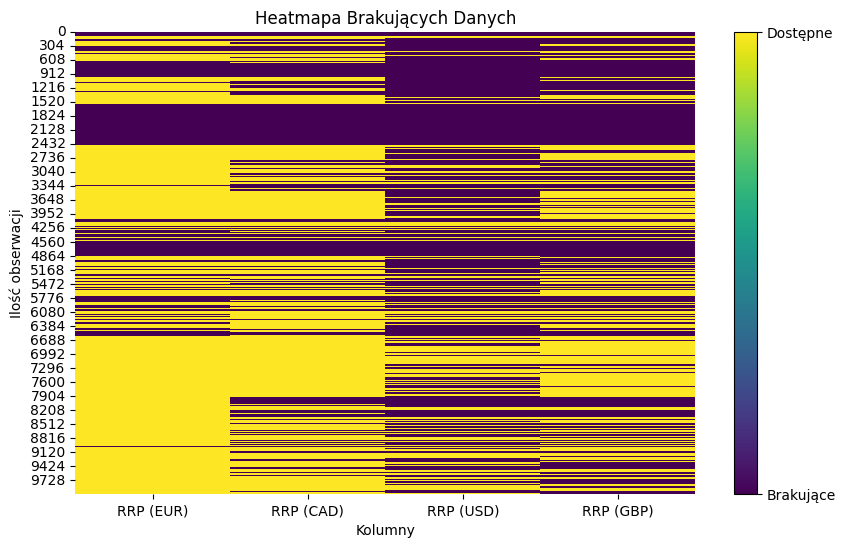

In [66]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(sets_df_hm.isnull(), cbar=False, cmap='viridis')

# Dodawanie legendy
cbar = heatmap.figure.colorbar(heatmap.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Brakujące', 'Dostępne'])

plt.title('Heatmapa Brakujących Danych')
plt.xlabel('Kolumny')
plt.ylabel('Ilość obserwacji')

plt.show()

In [67]:
sets_df

Number      Theme               Subtheme  Year   
0        3695-1   Fabuland                    NaN  1982  \
1        1066-1      Dacta                   Town  1982   
2      852293-1       Gear            Board Games  2008   
3        3866-1      Games               Licensed  2012   
4        9247-2  Education                    NaN  2006   
...         ...        ...                    ...   ...   
10020  851942-1       Gear         Role-play toys  2007   
10021  851641-1       Gear  Trading/Playing cards  2007   
10022  852043-1       Gear               Clothing  2007   
10023  852038-1       Gear               Clothing  2007   
10024  852037-1       Gear               Clothing  2007   

                                     Set name  Minifigs  Pieces  RRP (GBP)   
0                           Figure collection      80.0     NaN        NaN  \
1              Little People with Accessories      36.0   138.0        NaN   
2                      Castle Giant Chess Set      33.0     NaN     136.99   
3               Star Wars: The Battle of Hoth      32.0   305.0      24.99   
4                           Community Workers      31.0   235.0      36.99   
...                                       ...       ...     ...        ...   
10020                           Viking Armour       NaN     NaN      14.99   
10021                        City Memory Game       NaN     NaN       6.49   
10022                         Grey Racers Cap       NaN     NaN       7.99   
10023  Exo-Force Turquoise Children's T-shirt       NaN     NaN        NaN   
10024       Exo-Force Navy Children's T-shirt       NaN     NaN        NaN   

       RRP (USD)  RRP (CAD)  RRP (EUR)  Value used (USD) Launch date   
0            NaN        NaN        NaN               NaN         NaN  \
1            NaN        NaN        NaN               NaN         NaN   
2         199.99        NaN        NaN            794.31         NaN   
3            NaN        NaN        NaN             30.35  01/02/2012   
4          49.99      69.99        NaN             46.35         NaN   
...          ...        ...        ...               ...         ...   
10020        NaN        NaN        NaN               NaN         NaN   
10021       7.99        NaN        NaN               NaN         NaN   
10022        NaN        NaN        NaN               NaN         NaN   
10023        NaN        NaN        NaN               NaN         NaN   
10024        NaN        NaN        NaN               NaN         NaN   

        Exit date  theme_id   
0             NaN     390.0  \
1             NaN     533.0   
2             NaN     193.0   
3      31/12/2013     502.0   
4             NaN     533.0   
...           ...       ...   
10020         NaN     737.0   
10021         NaN     741.0   
10022         NaN     501.0   
10023         NaN     501.0   
10024         NaN     501.0   

                                                 img_url  Decade  
0      https://cdn.rebrickable.com/media/sets/3695-1.jpg    1980  
1      https://cdn.rebrickable.com/media/sets/1066-1.jpg    1980  
2      https://cdn.rebrickable.com/media/sets/852293-...    2000  
3      https://cdn.rebrickable.com/media/sets/3866-1.jpg    2010  
4      https://cdn.rebrickable.com/media/sets/9247-2.jpg    2000  
...                                                  ...     ...  
10020  https://cdn.rebrickable.com/media/sets/851942-...    2000  
10021  https://cdn.rebrickable.com/media/sets/851641-...    2000  
10022  https://cdn.rebrickable.com/media/sets/852043-...    2000  
10023  https://cdn.rebrickable.com/media/sets/852038-...    2000  
10024  https://cdn.rebrickable.com/media/sets/852037-...    2000  

[10025 rows x 17 columns]

In [68]:
fig = px.line()

# Dodaj pogrubić linię dla średniej
fig.add_scatter(x=mean_price_EUR['Year'], y=mean_price_EUR['Mean Price EUR'], mode='lines', name='Średnia ceny w euro', line_shape='linear')

# Dodaj pogrubić linię dla mediany
fig.add_scatter(x=median_price_EUR['Year'], y=median_price_EUR['Median Price EUR'], mode='lines', name='Mediana ceny w euro', line_shape='linear')

# Dodaj słupki dla ilości zestawów w każdym roku - dostosuj szerokość
fig.add_bar(x=counts_per_year['Year'], y=counts_per_year['Number_of_sets'], name='Ilość zestawów', marker_color='LightSkyBlue')
fig.update_xaxes(dtick=1)
fig.update_layout(
    title='Porównanie średniej, mediany cen w EURO i ilości zestawów w każdym roku',
    title_x=0.5,
    xaxis_title='Rok',
    yaxis_title='Wartość',
    showlegend=True,
    legend=dict(
        title='Legenda',  # Dodaj nazwę legendy
        traceorder='normal',  # Kolejność rysowania śladów
    )
)
# Wyświetl wykres
fig.show()


# Ramka Themes

In [69]:
sets_themes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22319 entries, 0 to 22318
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Number       22319 non-null  object 
 1   name_sets    22319 non-null  object 
 2   year         22319 non-null  int64  
 3   theme_id     22319 non-null  int64  
 4   num_parts    22319 non-null  int64  
 5   img_url      22319 non-null  object 
 6   id           22319 non-null  int64  
 7   name_themes  22319 non-null  object 
 8   parent_id    13146 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 1.5+ MB


In [70]:
sets_themes.describe()

year      theme_id     num_parts            id     parent_id
count  22319.000000  22319.000000  22319.000000  22319.000000  13146.000000
mean    2007.995385    456.585510    162.547336    456.585510    397.122319
std       14.024898    226.407361    420.728064    226.407361    190.426533
min     1949.000000      1.000000      0.000000      1.000000      1.000000
25%     2002.000000    273.000000      2.000000    273.000000    233.000000
50%     2012.000000    501.000000     31.000000    501.000000    501.000000
75%     2018.000000    652.000000    141.000000    652.000000    504.000000
max     2024.000000    761.000000  11695.000000    761.000000    754.000000

In [71]:
fig = px.box(sets_themes, y='year')

fig.show()

In [72]:
fig = px.box(sets_themes, y='num_parts')
fig.update_layout(
    yaxis=dict(
        title='Liczba elementów w tyś.',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    )
)

fig.show()

In [73]:
Max = sets_themes[sets_themes['num_parts']==11695]
Max

Number  name_sets  year  theme_id  num_parts   
4396  31203-1  World Map  2021       709      11695  \

                                                img_url   id name_themes   
4396  https://cdn.rebrickable.com/media/sets/31203-1...  709    LEGO Art  \

      parent_id  
4396        NaN

In [74]:
sets_themes

Number                        name_sets  year  theme_id   
0      0003977811-1      Ninjago: Book of Adventures  2022       761  \
1             001-1                            Gears  1965       756   
2            0011-2                Town Mini-Figures  1979        67   
3            0011-3       Castle 2 for 1 Bonus Offer  1987       199   
4            0012-1               Space Mini-Figures  1979       143   
...             ...                              ...   ...       ...   
22314       XWING-1              Mini X-Wing Fighter  2019       158   
22315       XWING-2                X-Wing Trench Run  2019       158   
22316   YODACHRON-1  Yoda Chronicles Promotional Set  2013       158   
22317    YTERRIER-1                Yorkshire Terrier  2018       598   
22318      ZX8000-1             ZX 8000 LEGO Sneaker  2020       501   

       num_parts                                            img_url   id   
0              1  https://cdn.rebrickable.com/media/sets/0003977...  761  \
1             43   https://cdn.rebrickable.com/media/sets/001-1.jpg  756   
2             12  https://cdn.rebrickable.com/media/sets/0011-2.jpg   67   
3              0  https://cdn.rebrickable.com/media/sets/0011-3.jpg  199   
4             12  https://cdn.rebrickable.com/media/sets/0012-1.jpg  143   
...          ...                                                ...  ...   
22314         60  https://cdn.rebrickable.com/media/sets/xwing-1...  158   
22315         52  https://cdn.rebrickable.com/media/sets/xwing-2...  158   
22316        413  https://cdn.rebrickable.com/media/sets/yodachr...  158   
22317          0  https://cdn.rebrickable.com/media/sets/yterrie...  598   
22318          0  https://cdn.rebrickable.com/media/sets/zx8000-...  501   

                          name_themes  parent_id  
0      Activity Books with LEGO Parts      497.0  
1                           Samsonite      365.0  
2                        Classic Town       50.0  
3                        Lion Knights      186.0  
4                        Supplemental      126.0  
...                               ...        ...  
22314                       Star Wars        NaN  
22315                       Star Wars        NaN  
22316                       Star Wars        NaN  
22317                     Promotional        NaN  
22318                            Gear        NaN  

[22319 rows x 9 columns]

In [75]:
max_sets_theme_per_year = sets_themes.groupby(['year', 'name_themes']).size().reset_index(name='num_sets')

# Wybieranie 1 motywu z największą ilością zestawów LEGO dla każdego roku
max_sets_theme_per_year = max_sets_theme_per_year.loc[max_sets_theme_per_year.groupby('year')['num_sets'].idxmax()]
dominance_years = max_sets_theme_per_year.groupby('name_themes')['year'].nunique().reset_index(name='dominance_years')

# Tworzenie wykresu
fig = px.bar(max_sets_theme_per_year, x='year', y='num_sets', color='name_themes',
             labels={'year': 'Rok', 'num_sets': 'Liczba zestawów LEGO', 'name_themes': 'Motyw'},
             title='Motyw z największą ilością zestawów LEGO w każdym roku',
             hover_name='name_themes')

fig.update_layout(title_x=0.5)

# Wyświetl wykres
fig.show()

In [76]:
dominance_years = dominance_years.sort_values(by='dominance_years', ascending=False)
dominance_years = dominance_years.head(10)
dominance_years

name_themes  dominance_years
19  Supplemental               13
7   Classic Town               11
21       Technic                9
3       Bionicle                6
18     Star Wars                6
17     Samsonite                5
10       Friends                3
11          Gear                2
16       Ninjago                2
14     Key Chain                2

In [77]:

fig = px.bar(dominance_years, x='name_themes', y='dominance_years', color='name_themes',
             labels={'name_themes': 'Motyw', 'dominance_years': 'Liczba lat wystąpień'},
             title='Ilość lat dominujących motywów w historii firmy')
fig.update_layout(title=dict(x=0.5))
fig.show()

In [78]:

sets_themes['Decade'] = sets_themes['year'] // 10 * 10
themes_counts = sets_themes.groupby(['Decade', 'name_themes']).size().reset_index(name='Count')
top_themes = themes_counts.groupby('Decade').apply(lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)

fig = px.bar(top_themes, x='Decade', y='Count', color='name_themes',
             labels={'Decade': 'Dekada', 'Count': 'Liczba zestawów LEGO motywu', 'name_themes': 'Motyw'},
             title='Najczęściej występujące motywy w każdej dekadzie')
fig.update_layout(title=dict(x=0.5))
fig.show()


In [79]:
set_cnt_all = sets_themes.groupby('name_themes').count().reset_index()
set_cnt_all_sorted = set_cnt_all.sort_values(by='Number', ascending=False)
set_cnt_all_sorted.rename(columns={'Number':"count of sets"},inplace=True)
top_10_values = set_cnt_all_sorted.head(10)
fig = px.histogram(top_10_values, x="name_themes",y='count of sets',color='name_themes',
                   labels={'name_themes': 'Motyw'}, title='10 motywów z największą ilością zestawów')
fig.update_layout(
    yaxis=dict(
        title='Liczba zestawów LEGO',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    ))
fig.update_layout(title=dict(x=0.5))
fig.show()

In [80]:
themes_per_year = sets_themes.groupby('year')['name_themes'].nunique().reset_index(name='count_of_sets')


In [81]:
fig = px.scatter(themes_per_year, x="year", y="count_of_sets", 
                 labels={'count_of_sets': 'Ilość motywów', 'year': 'Rok'}, 
                 title='Ilość motywów w zależności od roku')
fig.update_layout(title=dict(x=0.5))
fig.show()

In [82]:
sets_themes

Number                        name_sets  year  theme_id   
0      0003977811-1      Ninjago: Book of Adventures  2022       761  \
1             001-1                            Gears  1965       756   
2            0011-2                Town Mini-Figures  1979        67   
3            0011-3       Castle 2 for 1 Bonus Offer  1987       199   
4            0012-1               Space Mini-Figures  1979       143   
...             ...                              ...   ...       ...   
22314       XWING-1              Mini X-Wing Fighter  2019       158   
22315       XWING-2                X-Wing Trench Run  2019       158   
22316   YODACHRON-1  Yoda Chronicles Promotional Set  2013       158   
22317    YTERRIER-1                Yorkshire Terrier  2018       598   
22318      ZX8000-1             ZX 8000 LEGO Sneaker  2020       501   

       num_parts                                            img_url   id   
0              1  https://cdn.rebrickable.com/media/sets/0003977...  761  \
1             43   https://cdn.rebrickable.com/media/sets/001-1.jpg  756   
2             12  https://cdn.rebrickable.com/media/sets/0011-2.jpg   67   
3              0  https://cdn.rebrickable.com/media/sets/0011-3.jpg  199   
4             12  https://cdn.rebrickable.com/media/sets/0012-1.jpg  143   
...          ...                                                ...  ...   
22314         60  https://cdn.rebrickable.com/media/sets/xwing-1...  158   
22315         52  https://cdn.rebrickable.com/media/sets/xwing-2...  158   
22316        413  https://cdn.rebrickable.com/media/sets/yodachr...  158   
22317          0  https://cdn.rebrickable.com/media/sets/yterrie...  598   
22318          0  https://cdn.rebrickable.com/media/sets/zx8000-...  501   

                          name_themes  parent_id  Decade  
0      Activity Books with LEGO Parts      497.0    2020  
1                           Samsonite      365.0    1960  
2                        Classic Town       50.0    1970  
3                        Lion Knights      186.0    1980  
4                        Supplemental      126.0    1970  
...                               ...        ...     ...  
22314                       Star Wars        NaN    2010  
22315                       Star Wars        NaN    2010  
22316                       Star Wars        NaN    2010  
22317                     Promotional        NaN    2010  
22318                            Gear        NaN    2020  

[22319 rows x 10 columns]

In [83]:
# Sortowanie danych według ilości elementów (num_parts) malejąco
sorted_df = sets_themes.sort_values(by='num_parts', ascending=False)

# Wybieranie 10 zestawów z największą ilością elementów
top_10_sets = sorted_df.head(10)


top10_sets = top_10_sets[['year', 'name_sets', 'num_parts', 'name_themes']]
top_10_sets


Number                      name_sets  year  theme_id  num_parts   
4396    31203-1                      World Map  2021       709      11695  \
410     10307-1                   Eiffel Tower  2022       721      10001   
21021  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987   
396     10294-1                        Titanic  2021       721       9092   
377     10276-1                      Colosseum  2020       721       9036   
15434   75192-1              Millennium Falcon  2017       171       7541   
15566   75313-1                          AT-AT  2021       171       6785   
15586   75331-1                The Razor Crest  2022       171       6187   
420     10316-1   Lord of the Rings: Rivendell  2023       721       6182   
14973   71799-1           NINJAGO City Markets  2023       435       6163   

                                                 img_url   id   
4396   https://cdn.rebrickable.com/media/sets/31203-1...  709  \
410    https://cdn.rebrickable.com/media/sets/10307-1...  721   
21021  https://cdn.rebrickable.com/media/sets/bigbox-...  571   
396    https://cdn.rebrickable.com/media/sets/10294-1...  721   
377    https://cdn.rebrickable.com/media/sets/10276-1...  721   
15434  https://cdn.rebrickable.com/media/sets/75192-1...  171   
15566  https://cdn.rebrickable.com/media/sets/75313-1...  171   
15586  https://cdn.rebrickable.com/media/sets/75331-1...  171   
420    https://cdn.rebrickable.com/media/sets/10316-1...  721   
14973  https://cdn.rebrickable.com/media/sets/71799-1...  435   

                     name_themes  parent_id  Decade  
4396                    LEGO Art        NaN    2020  
410                        Icons        NaN    2020  
21021           Legends of Chima        NaN    2010  
396                        Icons        NaN    2020  
377                        Icons        NaN    2020  
15434  Ultimate Collector Series      158.0    2010  
15566  Ultimate Collector Series      158.0    2020  
15586  Ultimate Collector Series      158.0    2020  
420                        Icons        NaN    2020  
14973                    Ninjago        NaN    2020

In [84]:
max_parts_sets = sets_themes.loc[sets_themes.groupby('Decade')['num_parts'].idxmax()]
max_parts_sets = max_parts_sets[['Number', 'name_sets', 'Decade', 'name_themes', 'num_parts']]

In [85]:

fig = px.bar(max_parts_sets, x="Decade",y='num_parts',color='name_themes',
                   labels={'name_themes': 'Motyw'}, title='Zestaw o największej ilości elementów każdej dekady')
fig.update_layout(
    yaxis=dict(
        title='Liczba elementów',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    ))
fig.update_layout(
    xaxis=dict(
        title='Dekada',
        titlefont=dict(size=14),
        tickfont=dict(size=12),
    ))
fig.update_layout(title=dict(x=0.5))
fig.show()